<a href="https://colab.research.google.com/github/georgesteve/Research-Assitant-ML-ROJ/blob/main/Grafico_de_S4_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando librerías

In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

##Importando data

In [ ]:
URL = "https://raw.githubusercontent.com/georgesteve/Research-Assitant-ML-ROJ/main/gfajardo_uNz2xU-2020-2.csv"
Data = pd.read_csv(URL,index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:

Data = pd.read_csv('/content/gdrive/My Drive/gfajardo_uNz2xU-2020.csv',index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

##Transformando columnas de tiempo a formato datetime

In [5]:
s4['date_time'] = pd.to_datetime(s4['Año']*1000+s4['Day'], format='%y%j')+pd.Series([pd.Timedelta(seconds=x) for x in s4['Tiempo']])

s4.head(20)

,Año,Day,Tiempo,PRN,S4,Az,Elv,date_time
0,20.0,306.0,22.0,3.0,0.10,300.9,24.6,2020-11-01 00:00:22
1,20.0,306.0,22.0,8.0,0.05,199.5,47.2,2020-11-01 00:00:22
2,20.0,306.0,22.0,10.0,0.40,147.1,14.3,2020-11-01 00:00:22
3,20.0,306.0,22.0,11.0,0.08,210.6,26.2,2020-11-01 00:00:22
4,20.0,306.0,22.0,16.0,0.04,342.4,42.3,2020-11-01 00:00:22
5,20.0,306.0,22.0,21.0,0.07,205.5,30.1,2020-11-01 00:00:22
6,20.0,306.0,22.0,22.0,0.06,282.5,40.4,2020-11-01 00:00:22
7,20.0,306.0,22.0,26.0,0.13,10.9,16.8,2020-11-01 00:00:22
8,20.0,306.0,22.0,27.0,0.03,134.2,71.7,2020-11-01 00:00:22
9,20.0,306.0,22.0,32.0,0.05,103.2,42.1,2020-11-01 00:00:22


##Aplicando filtros

In [36]:
# azimuth cada 15 grados
s4_clean=s4[np.isfinite(s4['S4'])]
s4_clean.set_index('date_time', inplace=True)
s4_1min=s4_clean.resample("10s").mean()


#Filtros
s4_clean=s4_clean[s4_clean['Elv']>30]

##Generando grupos

In [7]:

#s4["Azint"]=s4["Az"].astype(float)

clasi=s4_clean.groupby(pd.cut(s4_clean["Az"], np.arange(0, 361, 30)))
#print(list(m))
print(clasi.groups.keys())
#print(np.arange(0, 360, 30))




dict_keys([Interval(0, 30, closed='right'), Interval(30, 60, closed='right'), Interval(60, 90, closed='right'), Interval(90, 120, closed='right'), Interval(120, 150, closed='right'), Interval(150, 180, closed='right'), Interval(180, 210, closed='right'), Interval(210, 240, closed='right'), Interval(240, 270, closed='right'), Interval(270, 300, closed='right'), Interval(300, 330, closed='right'), Interval(330, 360, closed='right')])


In [ ]:
s4_1min.head()

,Año,Day,Tiempo,PRN,S4,Az,Elv
date_time,,,,,,,
2020-11-01 00:00:00,20.0,306.0,1793.015385,26.995385,0.093138,216.856154,39.117385
2020-11-01 01:00:00,20.0,306.0,5378.788991,26.229358,0.085535,196.463150,41.862538
2020-11-01 02:00:00,20.0,306.0,8989.314112,24.996965,0.078953,191.290895,43.127466
2020-11-01 03:00:00,20.0,306.0,12618.220472,23.072441,0.087764,168.564567,43.157953
2020-11-01 04:00:00,20.0,306.0,16190.411498,22.686838,0.088865,174.943570,38.067474


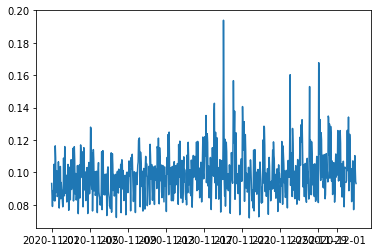

In [ ]:
plt.plot(s4_1min['S4'])

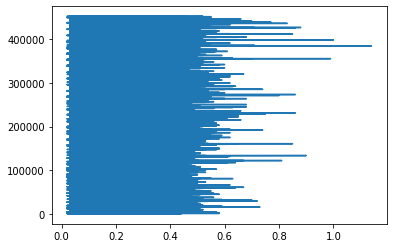

In [ ]:
plt.plot(s4['S4'],s4.index)

In [ ]:
x=s4_1min.index.minute.values
y=s4_1min.S4.values


##Graficando cada arreglo

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN   0.07   0.09    NaN    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85518.0    NaN    NaN    NaN    NaN    NaN  ...   0.09    NaN    NaN    NaN    NaN
85522.0    NaN    NaN    NaN    NaN    NaN  ...    NaN   0.06   0.12    NaN    NaN
8554

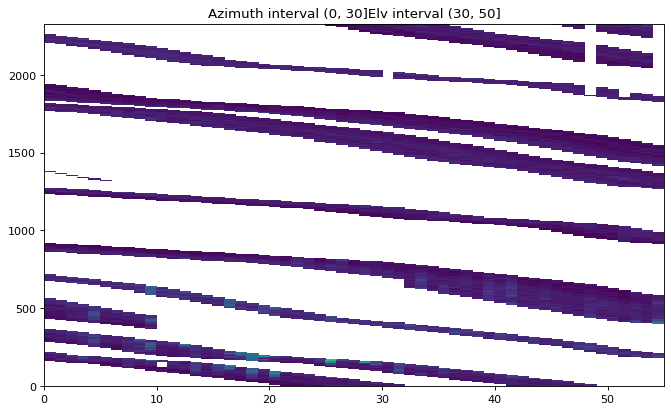

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
202.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
262.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85222.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85282.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85342.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8546

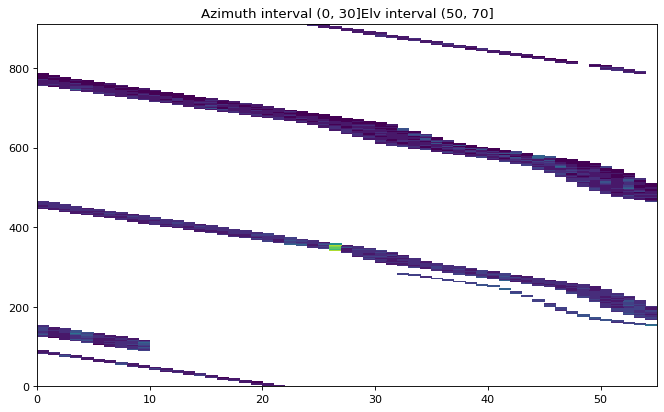

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
742.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.06
802.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.06
862.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.06
922.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.07
982.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   0.07   0.06
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
81922.0   0.05   0.06    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
81982.0   0.06    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82042.0   0.07    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82102.0   0.05    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8216

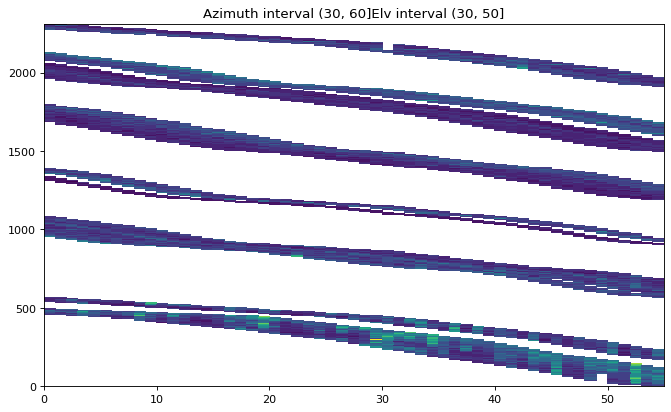

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
202.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
262.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85222.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85282.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85342.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8546

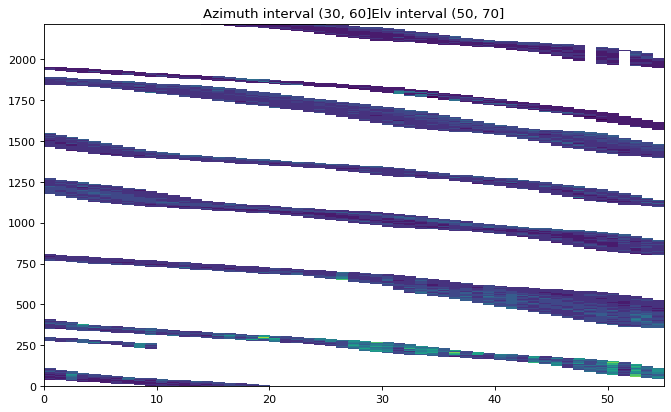

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
322.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
382.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
562.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
84982.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85042.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85222.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85282.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8546

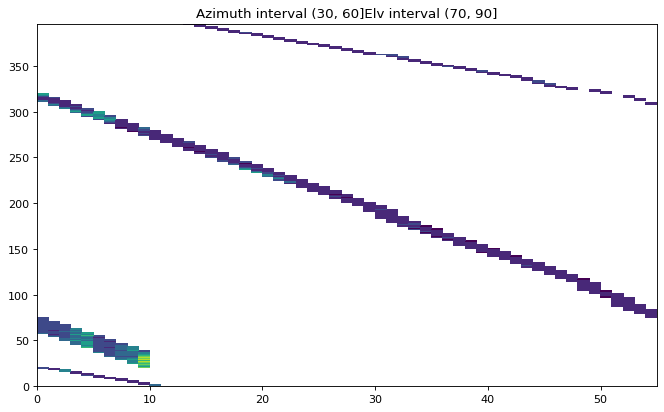

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
622.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.06
682.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.07
862.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   0.06    NaN
922.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   0.07    NaN
1102.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.06    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
84742.0   0.04   0.06    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
84802.0   0.04    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
84862.0   0.05    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
84922.0   0.05    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8498

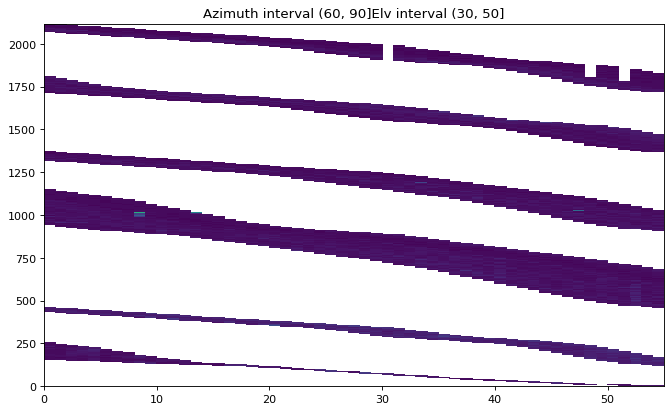

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
18.0       NaN    NaN    NaN    NaN    NaN  ...   0.04   0.04    NaN    NaN    NaN
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.04   0.05   0.05
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
78.0       NaN    NaN    NaN    NaN    NaN  ...   0.04   0.04    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.04   0.05   0.04
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85282.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.04   0.04    NaN
85342.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.04   0.04    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN   0.04   0.05   0.04    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN   0.04   0.04   0.05    NaN
8552

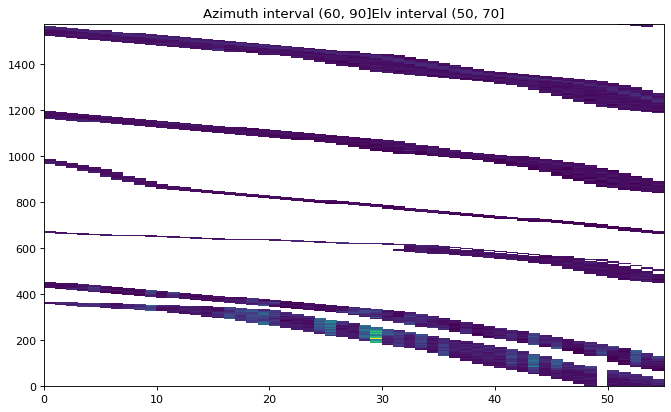

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
202.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
262.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85222.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85282.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85342.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8546

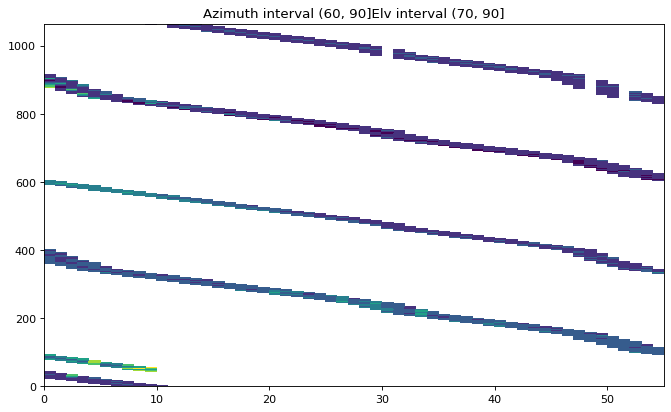

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0      0.05   0.06   0.05   0.06   0.04  ...    NaN    NaN    NaN    NaN    NaN
82.0      0.04   0.06   0.06   0.05   0.04  ...    NaN    NaN    NaN    NaN    NaN
142.0     0.04   0.06   0.07   0.05   0.04  ...    NaN    NaN    NaN    NaN    NaN
202.0     0.04   0.05   0.06   0.05   0.06  ...    NaN    NaN    NaN    NaN    NaN
262.0     0.06   0.04   0.06   0.04   0.04  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85282.0   0.05   0.05   0.05   0.05   0.05  ...    NaN    NaN    NaN    NaN    NaN
85342.0   0.05   0.05   0.05   0.04   0.06  ...    NaN    NaN    NaN    NaN    NaN
85402.0   0.05   0.05   0.05   0.04   0.06  ...    NaN    NaN    NaN    NaN    NaN
85462.0   0.05   0.05   0.05   0.06   0.06  ...    NaN    NaN    NaN    NaN    NaN
8552

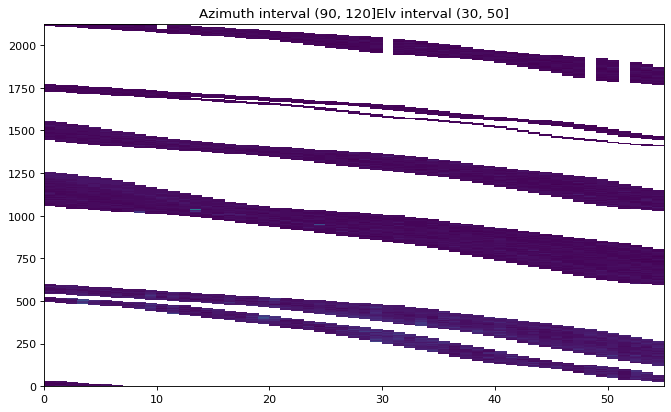

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
160.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
220.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
280.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85398.0    NaN    NaN    NaN    NaN    NaN  ...   0.04    NaN    NaN    NaN    NaN
85420.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85458.0    NaN    NaN    NaN    NaN    NaN  ...   0.04    NaN    NaN    NaN    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8551

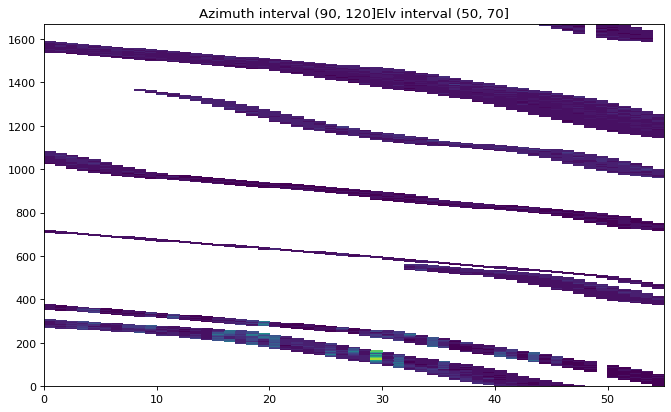

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN   0.04   0.03  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN   0.03   0.04   0.03  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN   0.03   0.04   0.03  ...    NaN    NaN    NaN    NaN    NaN
202.0      NaN    NaN   0.03   0.04   0.03  ...    NaN    NaN    NaN    NaN    NaN
262.0      NaN    NaN   0.04   0.03   0.03  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85282.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85342.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8552

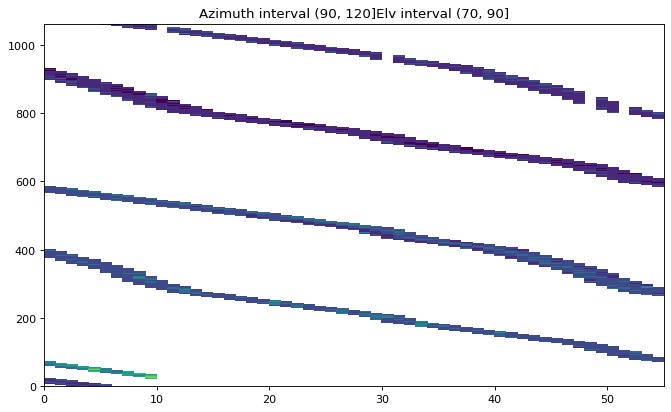

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.05
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.07
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.08
202.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   0.06   0.08
262.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   0.09   0.06
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85222.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85282.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85342.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8546

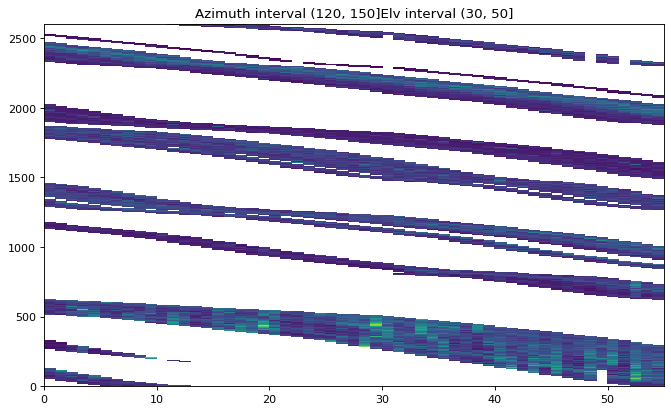

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
18.0       NaN    NaN    NaN    NaN    NaN  ...   0.03   0.04    NaN    NaN    NaN
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.05   0.04   0.03
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
78.0       NaN    NaN    NaN    NaN    NaN  ...   0.04   0.04    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.04   0.04   0.04
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85420.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85462.0   0.04   0.03    NaN    NaN    NaN  ...    NaN    NaN   0.04   0.04    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85522.0   0.04   0.04    NaN    NaN    NaN  ...    NaN   0.05   0.04   0.04    NaN
8554

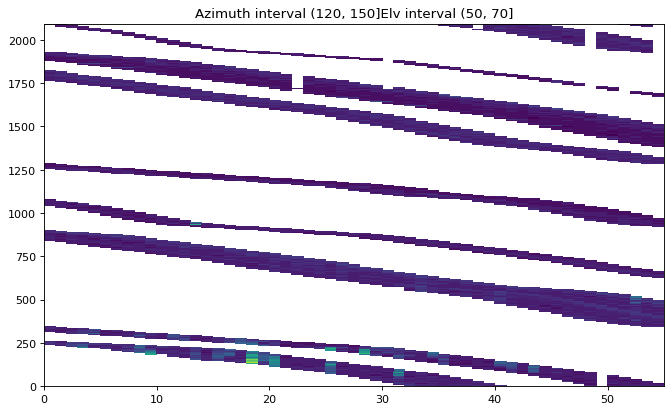

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0      0.03   0.03   0.03    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0      0.03   0.03    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0     0.03   0.03    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
202.0     0.04   0.03    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
262.0     0.03   0.03    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85282.0    NaN    NaN    NaN   0.04   0.03  ...    NaN    NaN    NaN    NaN    NaN
85342.0    NaN    NaN    NaN   0.04   0.03  ...    NaN    NaN    NaN    NaN    NaN
85402.0    NaN    NaN   0.03   0.03   0.03  ...    NaN    NaN    NaN    NaN    NaN
85462.0    NaN    NaN   0.04   0.03   0.03  ...    NaN    NaN    NaN    NaN    NaN
8552

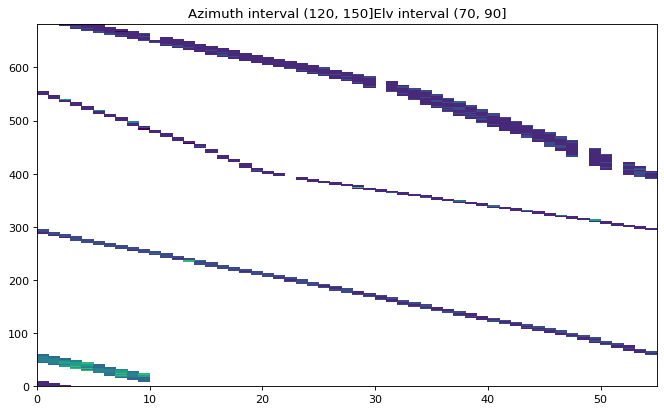

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
18.0       NaN    NaN    NaN    NaN    NaN  ...   0.06   0.07    NaN    NaN    NaN
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.07   0.07   0.08
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
78.0       NaN    NaN    NaN    NaN    NaN  ...   0.05   0.07    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.08   0.06   0.06
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN   0.06   0.06   0.06    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85518.0    NaN    NaN    NaN    NaN    NaN  ...   0.06    NaN    NaN    NaN    NaN
85522.0    NaN    NaN    NaN    NaN    NaN  ...    NaN   0.05   0.07   0.06    NaN
8554

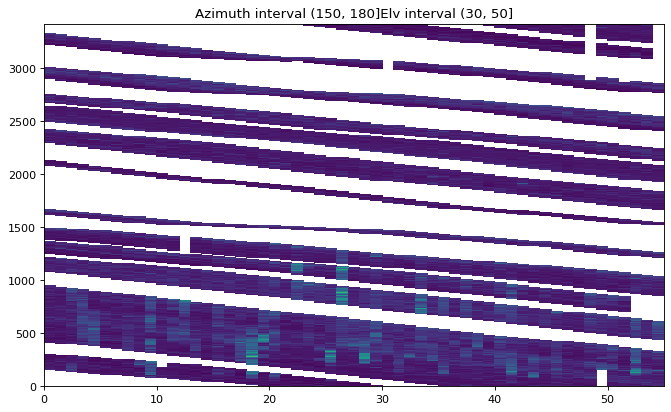

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85458.0    NaN    NaN    NaN    NaN    NaN  ...   0.03    NaN    NaN    NaN    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN   0.03    NaN    NaN    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85518.0    NaN    NaN    NaN    NaN    NaN  ...   0.03    NaN    NaN    NaN    NaN
8554

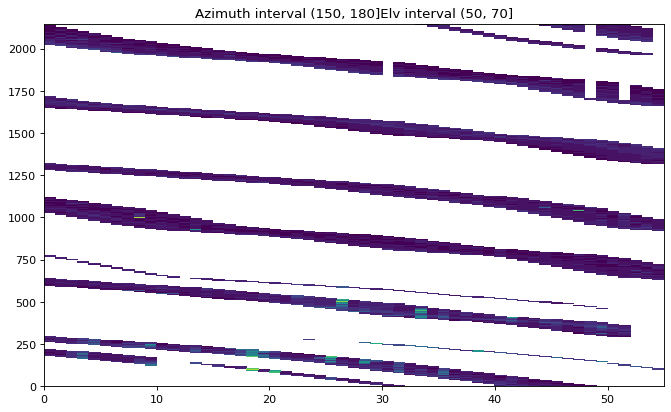

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
5362.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
5422.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
5482.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
5542.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
5602.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
68542.0   0.03   0.04    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
68602.0   0.04    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
68662.0   0.04    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
68722.0   0.03    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
6878

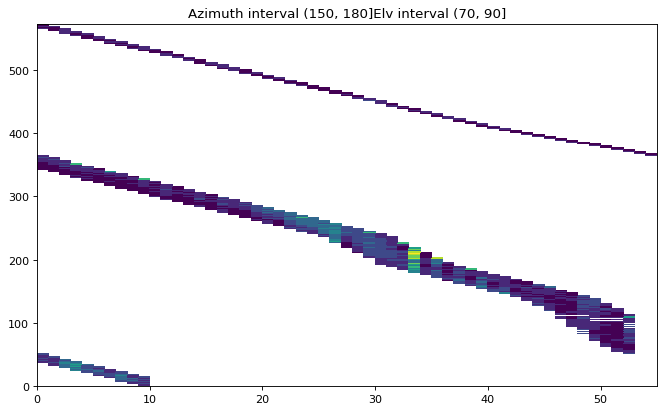

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
18.0       NaN    NaN    NaN    NaN    NaN  ...   0.07   0.07    NaN    NaN    NaN
22.0     0.060  0.055   0.07   0.07  0.080  ...    NaN    NaN   0.08   0.08    NaN
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
78.0       NaN    NaN    NaN    NaN    NaN  ...   0.08   0.07    NaN    NaN    NaN
82.0     0.065  0.055   0.06   0.06  0.065  ...    NaN    NaN   0.08   0.08    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85462.0  0.060  0.040   0.04   0.05  0.040  ...    NaN   0.06   0.08   0.08    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85518.0    NaN    NaN    NaN    NaN    NaN  ...   0.07    NaN    NaN    NaN    NaN
85522.0  0.070  0.050   0.04   0.05  0.050  ...    NaN   0.07   0.07   0.09    NaN
8554

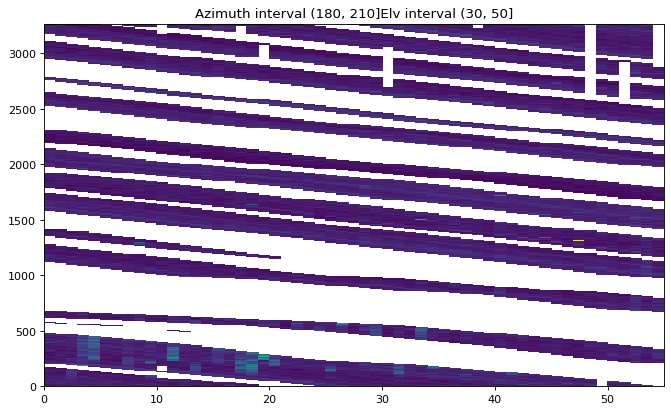

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN   0.04   0.05   0.05  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN   0.04   0.07   0.05  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN   0.04   0.06   0.04  ...    NaN    NaN    NaN    NaN   0.04
202.0      NaN   0.05   0.05   0.05   0.04  ...    NaN    NaN    NaN    NaN   0.05
262.0      NaN   0.04   0.05   0.05   0.05  ...    NaN    NaN    NaN    NaN   0.05
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85282.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85342.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8552

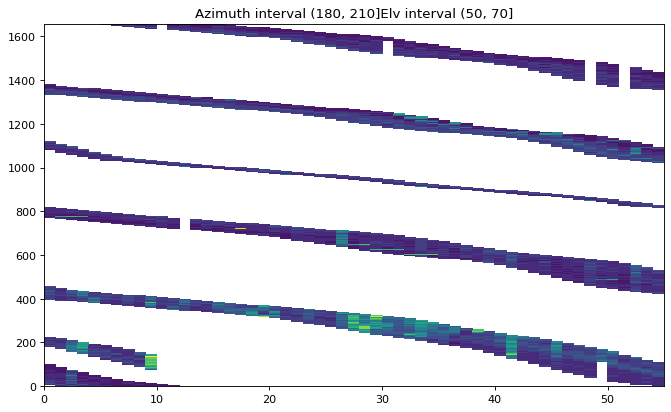

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
202.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
262.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85222.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85282.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85342.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8546

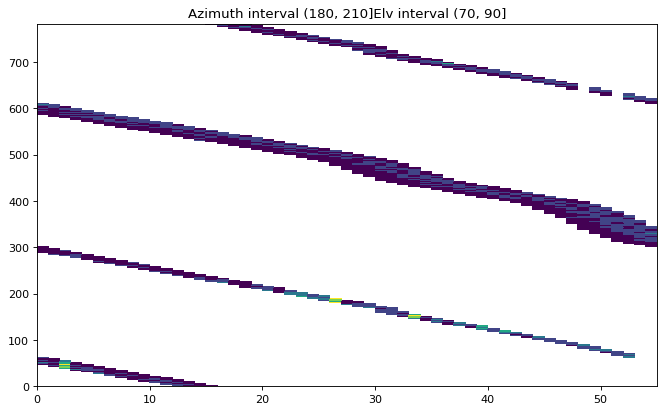

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85420.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8554

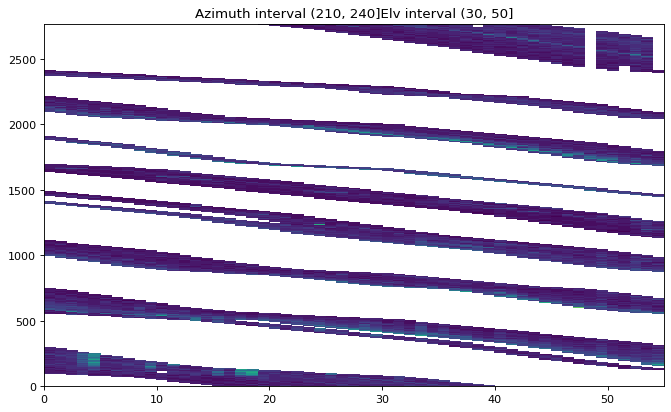

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.04
322.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   0.04    NaN
562.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.04    NaN    NaN
798.0      NaN    NaN    NaN    NaN    NaN  ...    NaN   0.04    NaN    NaN    NaN
858.0      NaN    NaN    NaN    NaN    NaN  ...    NaN   0.04    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
79582.0   0.04    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
79642.0   0.03    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
79702.0   0.04    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
79762.0   0.03    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
7982

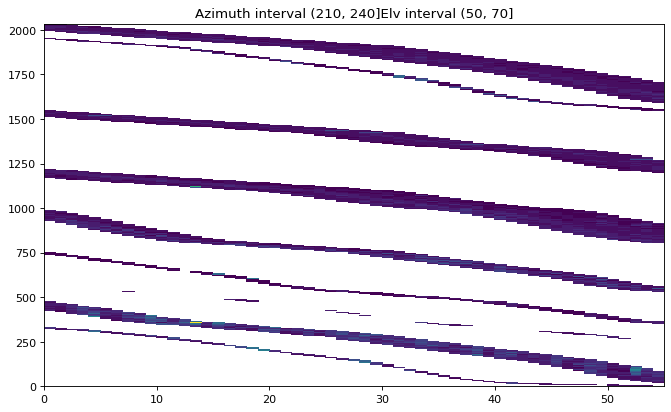

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
18.0       NaN    NaN    NaN    NaN    NaN  ...   0.03   0.03    NaN    NaN    NaN
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.04   0.04   0.04
78.0       NaN    NaN    NaN    NaN    NaN  ...   0.03   0.03    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN   0.04   0.04    NaN
138.0      NaN    NaN    NaN    NaN    NaN  ...   0.03   0.03    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85282.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85342.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   0.06    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   0.05    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   0.03    NaN
8552

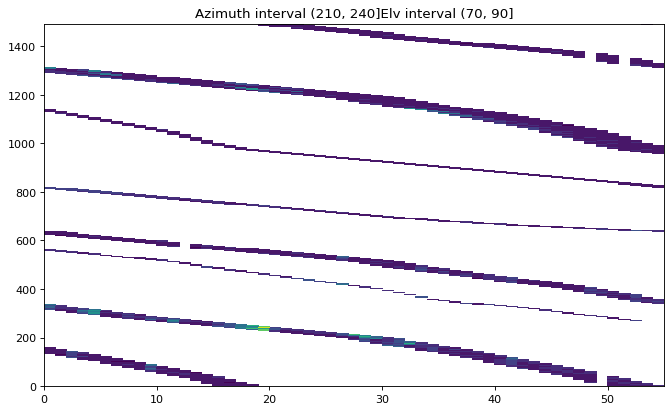

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
202.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
262.0      NaN    NaN    NaN    NaN   0.05  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85342.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85360.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85420.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8546

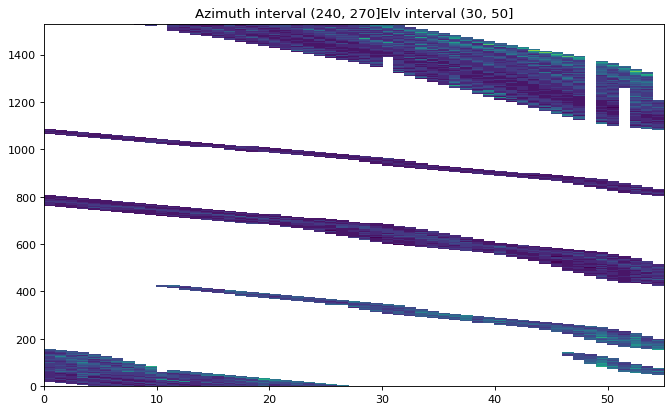

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
1582.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.04
1642.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.05
1702.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.05
1762.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.05
1822.0     NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   0.05
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
80842.0   0.03   0.03    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
80902.0   0.03    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
80962.0   0.03    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
81022.0   0.04    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8108

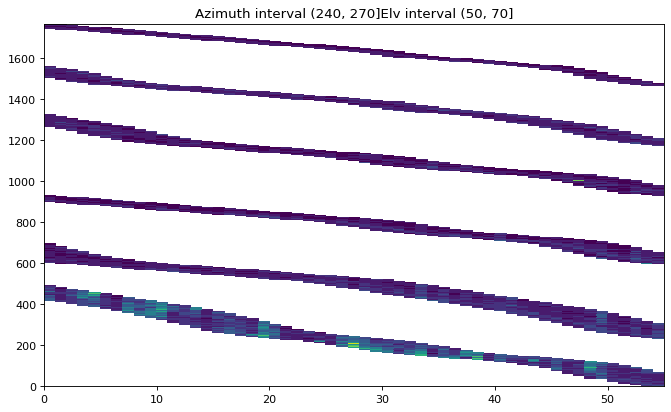

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN   0.04   0.04    NaN    NaN
85458.0    NaN    NaN    NaN    NaN    NaN  ...   0.05    NaN    NaN    NaN    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN   0.03   0.04    NaN    NaN
85518.0    NaN    NaN    NaN    NaN    NaN  ...   0.05    NaN    NaN    NaN    NaN
8552

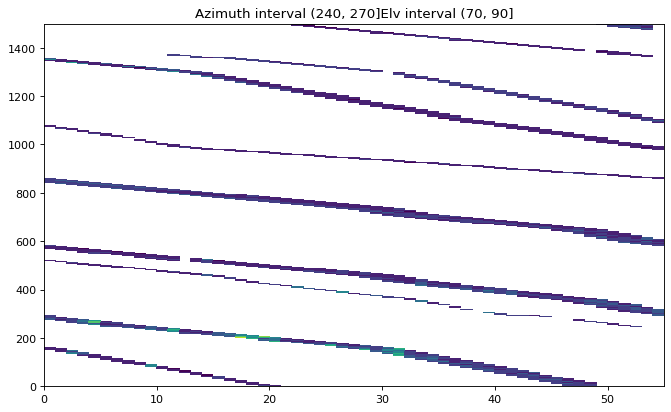

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
18.0       NaN    NaN    NaN    NaN    NaN  ...   0.10   0.08    NaN    NaN    NaN
22.0      0.06   0.07   0.07   0.06   0.07  ...    NaN    NaN   0.06   0.07   0.06
78.0       NaN    NaN    NaN    NaN    NaN  ...   0.08   0.06    NaN    NaN    NaN
82.0      0.05   0.08   0.08   0.05   0.08  ...    NaN    NaN   0.07   0.05   0.05
138.0      NaN    NaN    NaN    NaN    NaN  ...   0.08   0.05    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85282.0   0.06   0.05   0.05   0.09   0.06  ...    NaN    NaN    NaN    NaN    NaN
85342.0   0.04   0.05   0.06   0.07   0.06  ...    NaN    NaN    NaN    NaN    NaN
85402.0   0.06   0.05   0.05   0.07   0.07  ...    NaN    NaN    NaN    NaN    NaN
85462.0   0.05   0.07   0.08   0.05   0.09  ...    NaN    NaN    NaN   0.06    NaN
8552

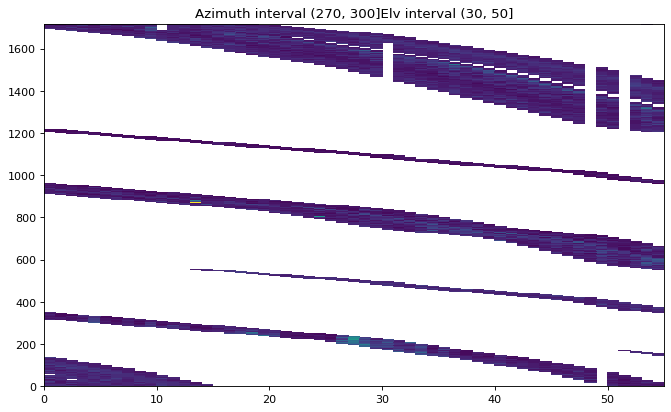

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
18.0       NaN    NaN    NaN    NaN    NaN  ...   0.05   0.04    NaN    NaN    NaN
22.0      0.04   0.04   0.04   0.05   0.04  ...    NaN    NaN   0.05   0.05   0.05
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
78.0       NaN    NaN    NaN    NaN    NaN  ...   0.05   0.04    NaN    NaN    NaN
82.0      0.04   0.04   0.04   0.05   0.04  ...    NaN    NaN   0.04   0.04   0.05
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85462.0   0.04   0.04   0.04   0.04   0.04  ...    NaN   0.06   0.06   0.05    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85518.0    NaN    NaN    NaN    NaN    NaN  ...   0.06    NaN    NaN    NaN    NaN
85522.0   0.04   0.04   0.04   0.04   0.04  ...    NaN   0.06   0.06   0.05    NaN
8554

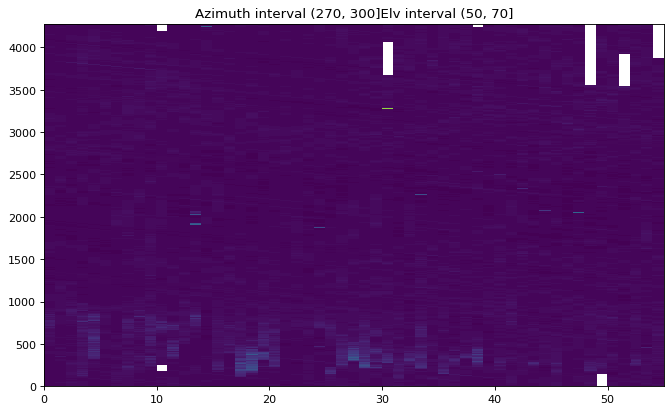

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85420.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85458.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8548

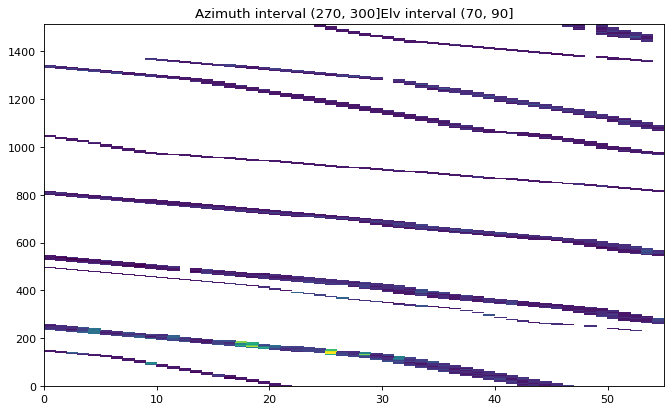

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
160.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
220.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
280.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85458.0    NaN    NaN    NaN    NaN    NaN  ...   0.12    NaN    NaN    NaN    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN   0.09   0.07    NaN    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85518.0    NaN    NaN    NaN    NaN    NaN  ...   0.12    NaN    NaN    NaN    NaN
8552

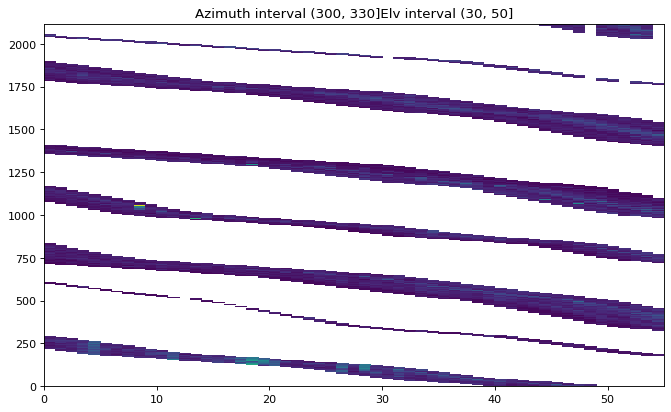

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
160.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
220.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
280.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85300.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85360.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85420.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8554

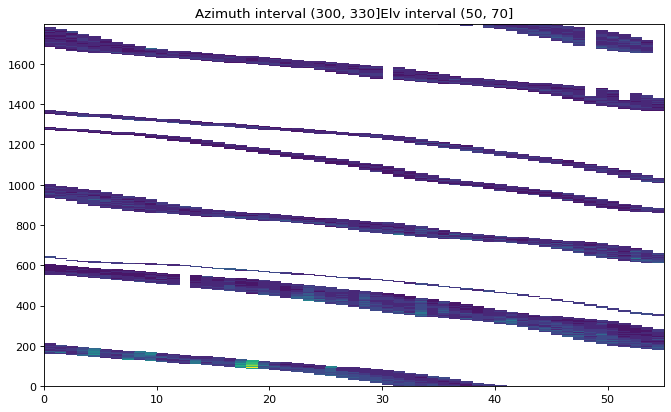

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85360.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85420.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8548

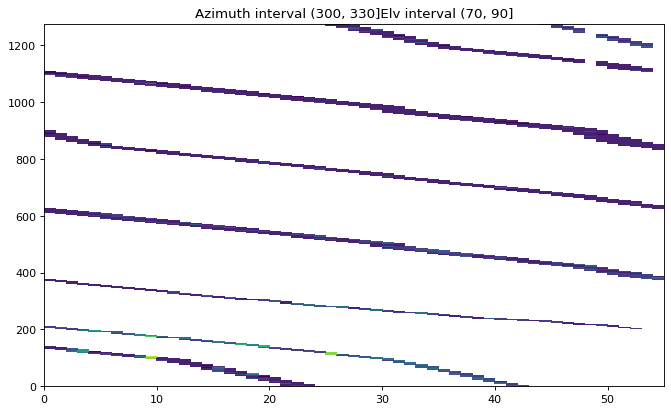

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0      0.04   0.04   0.04   0.06   0.07  ...    NaN    NaN    NaN    NaN    NaN
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0      0.07   0.05   0.06   0.06   0.09  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0     0.05   0.07   0.06   0.08   0.09  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85420.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85462.0   0.05   0.04   0.06   0.05   0.05  ...    NaN    NaN    NaN    NaN    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85522.0   0.05   0.04   0.05   0.05   0.06  ...    NaN    NaN    NaN    NaN    NaN
8554

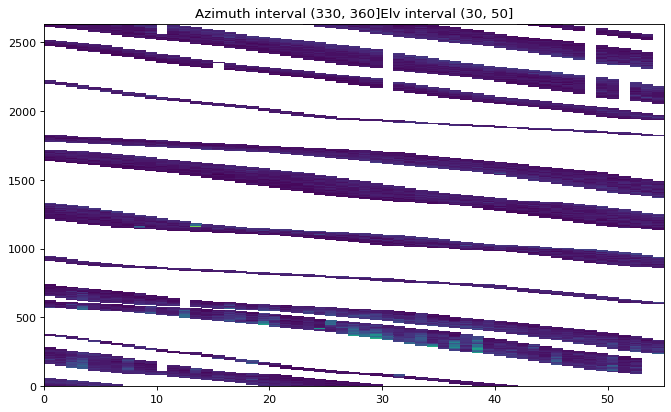

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
40.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
100.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85300.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85360.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85420.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8554

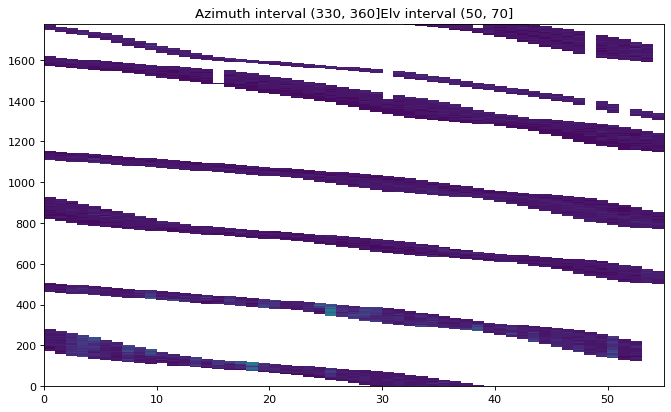

Day      306.0  307.0  308.0  309.0  310.0  ...  356.0  357.0  358.0  359.0  360.0
Tiempo                                      ...                                   
22.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
82.0       NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
142.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
202.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
262.0      NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
85402.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85420.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85462.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
85480.0    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
8554

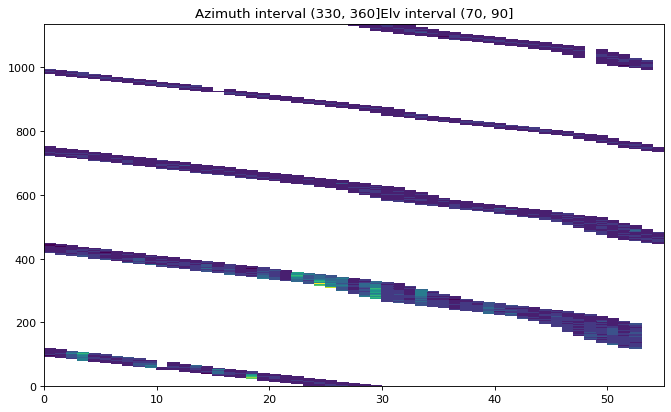

In [51]:
from scipy.interpolate import griddata
from jdcal import jd2jcal
from datetime import datetime
from matplotlib.pyplot import figure


import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate
import numpy as np
import matplotlib.colors as colors
from scipy.interpolate import griddata




def plot_S4_hour_day(df,i):
  figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
  xi = np.linspace(df.index.to_julian_date().min(), df.index.to_julian_date().max(), 50)
  yi = np.linspace(df.index.hour.min(), df.index.hour.max(), 50)
  zi = griddata((df.index.to_julian_date(),df.index.hour),df.S4,(xi[None,:],yi[:,None]),method='linear')
  xij = [jd2jcal(0,v) for v in xi]
  xid = [datetime(x[0],x[1],x[2]) for x in xij]
  plt.contourf(xid,yi,zi)
  plt.title(i)
  cbar=plt.colorbar()
  cp=plt.contour(xid,yi,zi,colors='black')
  plt.clabel(cp, inline=True, fontsize=10)
  cbar.ax.set_title('S4', rotation=360)
  plt.show()

def plot_S4_hour_day_2(df,i):
  figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
  hour_minute=df.index.hour*60+df.index.minute
  #print(hour_minute,df.index)
  xi = np.linspace(df.index.to_julian_date().min(), df.index.to_julian_date().max(), 600)
  yi = np.linspace(hour_minute.min(), hour_minute.max(), 600)
  zi = griddata((df.index.to_julian_date(),hour_minute),df.S4,(xi[None,:],yi[:,None]),method='linear')
  xij = [jd2jcal(0,v) for v in xi]
  xid = [datetime(x[0],x[1],x[2]) for x in xij]

  #fig, ax = plt.subplots()  
  n=plt.pcolormesh(xid, yi/60, zi)
  fig.colorbar(n)
  plt.title(i)
  plt.show()

def plot_S4_hour_day_3(df,i):
  figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
  #Just take in count that this "df" must have only one value per time
  


  piv = pd.pivot_table(df, index='Tiempo', columns='Day', values='S4')
  print(piv)
  xi = np.linspace(df.Day.min(), df.Day.max(), 600)
  yi = np.linspace(df.Tiempo.min(), df.Tiempo.max(), 600)

 
  gra=plt.pcolormesh(piv) #No se puede poner x,y porque el número de celdas está definido de forma automática en pivot,
                            #Se podría establecer con la longitud original del frame obtenido luego de aplicar pivot
  fig.colorbar(gra)
  plt.title(i)
  plt.show()


n = 366*24
df=s4_clean
#df["z"]=  s4.S4
#df["x"] = s4.index.date
#df["y"] = s4.index.day





for i, d in clasi:
  n=d.groupby(pd.cut(d["Elv"], np.arange(30, 91, 20)))
  #m=s4_clean.groupby(pd.cut(s4_clean["Az"], np.arange(0, 361, 30)))

  for i1,d1 in n:
    if len(d1)!=0:
        label='Azimuth interval '+str(i)+'Elv interval '+str(i1)
        plot_S4_hour_day_3(d1,label)


In [ ]:
print(s4_1min)

                      Año    Day   Tiempo  ...        S4          Az        Elv
date_time                                  ...                                 
2020-11-01 00:00:00  20.0  306.0     22.0  ...  0.095455  202.290909  36.927273
2020-11-01 00:01:00  20.0  306.0     82.0  ...  0.089091  202.081818  36.954545
2020-11-01 00:02:00  20.0  306.0    142.0  ...  0.098182  201.872727  36.981818
2020-11-01 00:03:00  20.0  306.0    202.0  ...  0.094545  201.654545  37.018182
2020-11-01 00:04:00  20.0  306.0    262.0  ...  0.095455  201.418182  37.045455
...                   ...    ...      ...  ...       ...         ...        ...
2020-12-25 21:26:00  20.0  360.0  77182.0  ...  0.085455  180.645455  37.127273
2020-12-25 21:27:00  20.0  360.0  77242.0  ...  0.088182  180.663636  37.145455
2020-12-25 21:28:00  20.0  360.0  77302.0  ...  0.087273  180.690909  37.181818
2020-12-25 21:29:00  20.0  360.0  77362.0  ...  0.096364  180.727273  37.209091
2020-12-25 21:30:00  20.0  360.0  77422.

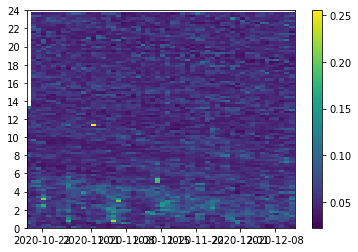

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate
import numpy as np
import matplotlib.colors as colors
from scipy.interpolate import griddata
from jdcal import jd2jcal
from datetime import datetime
from matplotlib.pyplot import figure


df=s4_clean

hour_minute=df.index.hour*60+df.index.minute
xi = np.linspace(df.index.to_julian_date().min(), df.index.to_julian_date().max(), 100)
yi = np.linspace(hour_minute.min(), hour_minute.max(), 100)
zi = griddata((df.index.to_julian_date(),hour_minute),df.S4,(xi[None,:],yi[:,None]),method='linear')

xij = [jd2jcal(0,v) for v in xi]
xid = [datetime(x[0],x[1],x[2]) for x in xij]

fig, ax = plt.subplots()  


# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.

levels = MaxNLocator(nbins=10).tick_values(df.S4.min(), df.S4.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)




#cp=ax.contour(xid,yi,zi,  3,colors='black')
#ax.clabel(cp, inline=True, fontsize=10)
m=ax.pcolormesh(xid, yi/60, zi)
plt.yticks(np.arange(0,25,2))#min(x), max(x)+1, 1.0))
fig.colorbar(m)


In [ ]:
###################### se grafican las componentes zonal , meridional y el módulo

y_bottom=79.5
y_top=100.5
plot_levels=12
cmap='jet'
#cmap=plt.cm.get_cmap('jet', plot_levels)

fontsize_p=18
dpi_p=300
#frame_size=(24,3*len(T))
frame_size=(30,3*len(T))

#thresh=60#100
#u0=np.clip(u0,-thresh,thresh)

plt.close()
##fig = plt.figure(figsize=frame_size)
fig, axes = plt.subplots(nrows=len(T)+1, ncols=3, constrained_layout=True,figsize=frame_size)
for ii in range(3*len(T)+3):
    if ii/9>=1 or (ii>=3 and ii<6) :
        thresh=30#100
    else:
        thresh=60#100
    if ii%3==0:
        if ii+1==1:
            ## zonal mean #cmap=plt.cm.get_cmap('cubehelix', 6)
            #im=axes[0,ii%3].pcolormesh(times_hr,rgs_km,tidal_comp_u[:,:,int((ii)/3)].T, cmap = 'jet',vmin=-thresh, vmax=thresh)
            im=axes[0,ii%3].pcolormesh(times_hr,rgs_km,tidal_comp_u[:,:,int((ii)/3)].T,cmap=cmap,vmin=-thresh, vmax=thresh)
            axes[0,ii%3].contour(times_hr, rgs_km, tidal_comp_u[:,:,int((ii)/3)].T, [-120, 0], colors='k') ## ORIGINAL
            axes[0,ii%3].set_title("Mean (U)", fontsize=fontsize_p)
            axes[0,ii%3].set_ylabel('Height (km)', fontsize=fontsize_p)
        else:
            ## zonal tides
            #im=axes[int((ii)/3),ii%3].pcolormesh(times_hr,rgs_km,tidal_comp_u[:,:,int((ii)/3)].T, cmap = 'jet',vmin=0, vmax=thresh)
            im=axes[int((ii)/3),ii%3].pcolormesh(times_hr,rgs_km,tidal_comp_u[:,:,int((ii)/3)].T, cmap=cmap,vmin=0, vmax=thresh)
            axes[int((ii)/3),ii%3].set_title(T_label[int((ii-3)/3)]+' (U)', fontsize=fontsize_p)
            axes[int((ii)/3),ii%3].set_ylabel('Height (km)', fontsize=fontsize_p)
        axes[int((ii)/3),ii%3].tick_params(axis="y", labelsize=fontsize_p)
        axes[int((ii)/3),ii%3].tick_params(axis="x", labelsize=fontsize_p)
        if ii>=3*len(T):
            axes[int((ii)/3),ii%3].set_xlabel('Days', fontsize=fontsize_p)
        else:
            axes[int((ii)/3),ii%3].set_xticklabels([], fontsize=fontsize_p)
        axes[int((ii)/3),ii%3].set_ylim(y_bottom,y_top)

    if ii%3==1:
        if ii+1==2:
            ## zonal mean
            #im=axes[0,ii%3].pcolormesh(times_hr,rgs_km,tidal_comp_v[:,:,int((ii)/3)].T, cmap = 'jet',vmin=-thresh, vmax=thresh)
            im=axes[0,ii%3].pcolormesh(times_hr,rgs_km,tidal_comp_v[:,:,int((ii)/3)].T, cmap=cmap,vmin=-thresh, vmax=thresh)
            axes[0,ii%3].contour(times_hr, rgs_km, tidal_comp_v[:,:,int((ii)/3)].T, [-120, 0], colors='k') ## ORIGINAL
            axes[0,ii%3].set_title("Mean (V)", fontsize=fontsize_p)
        else:
            ## zonal tides
            #im=axes[int((ii)/3),ii%3].pcolormesh(times_hr,rgs_km,tidal_comp_v[:,:,int((ii)/3)].T, cmap = 'jet',vmin=0, vmax=thresh)
            im=axes[int((ii)/3),ii%3].pcolormesh(times_hr,rgs_km,tidal_comp_v[:,:,int((ii)/3)].T, cmap=cmap,vmin=0, vmax=thresh)
            axes[int((ii)/3),ii%3].set_title(T_label[int((ii-3)/3)]+' (V)', fontsize=fontsize_p)
        axes[int((ii)/3),ii%3].tick_params(axis="x", labelsize=fontsize_p)
        if ii>=3*len(T):
            axes[int((ii)/3),ii%3].set_xlabel('Days', fontsize=fontsize_p)
        else:
            axes[int((ii)/3),ii%3].set_xticklabels([], fontsize=fontsize_p)
        axes[int((ii)/3),ii%3].set_yticklabels([], fontsize=fontsize_p)
        axes[int((ii)/3),ii%3].set_ylim(y_bottom,y_top)

    if ii%3==2:
        if ii+1==3:
            ## merid mean
            #im=axes[0,ii%3].pcolormesh(times_hr,rgs_km,np.sqrt(tidal_comp_u[:,:,int((ii)/3)].T**2+tidal_comp_v[:,:,int((ii)/3)].T**2), cmap = 'jet',vmin=-thresh, vmax=thresh)
            im=axes[0,ii%3].pcolormesh(times_hr,rgs_km,np.sqrt(tidal_comp_u[:,:,int((ii)/3)].T**2+tidal_comp_v[:,:,int((ii)/3)].T**2), cmap=cmap,vmin=-thresh, vmax=thresh)
            axes[0,ii%3].set_title("Mag(U,V)", fontsize=fontsize_p)
            axes[0,ii%3].set_yticklabels([], fontsize=fontsize_p)
        else:
            ## meridional tides
            #im=axes[int((ii)/3),ii%3].pcolormesh(times_hr,rgs_km,np.sqrt(tidal_comp_u[:,:,int((ii)/3)].T**2+tidal_comp_v[:,:,int((ii)/3)].T**2), cmap = 'jet',vmin=0, vmax=thresh)
            im=axes[int((ii)/3),ii%3].pcolormesh(times_hr,rgs_km,np.sqrt(tidal_comp_u[:,:,int((ii)/3)].T**2+tidal_comp_v[:,:,int((ii)/3)].T**2), cmap=cmap,vmin=0, vmax=thresh)
            axes[int((ii)/3),ii%3].set_title(T_label[int((ii-3)/3)]+' (Mag)', fontsize=fontsize_p)
            axes[int((ii)/3),ii%3].set_yticklabels([], fontsize=fontsize_p)
        axes[int((ii)/3),ii%3].tick_params(axis="x", labelsize=fontsize_p)
        if ii>=3*len(T):
            axes[int((ii)/3),ii%3].set_xlabel('Days', fontsize=fontsize_p)
        else:
            axes[int((ii)/3),ii%3].set_xticklabels([], fontsize=fontsize_p)
        axes[int((ii)/3),ii%3].set_ylim(y_bottom,y_top)
        
        cb=fig.colorbar(im, ax=axes[int((ii)/3), :], shrink=1.0)
        cb.set_label(  label = r'(m/s)',size=fontsize_p)
        cb.set_ticks([-thresh,-thresh/2,0,thresh/2,thresh])
        cb.ax.tick_params(labelsize=fontsize_p)
plt.savefig('/home/jose/Documentos/src/simone/climatologia/componentes2/M2_thresh60-30_2019-09-19 and 2020-11-30_window21.0.png',dpi=dpi_p)


#Grafico S4 de valores ùnicos

Day         306.0     307.0     308.0  ...     358.0     359.0     360.0
Tiempo                                 ...                              
18.0          NaN       NaN       NaN  ...       NaN       NaN       NaN
22.0     0.095455  0.101818  0.100909  ...  0.113000  0.074444  0.063333
40.0          NaN       NaN       NaN  ...       NaN       NaN       NaN
78.0          NaN       NaN       NaN  ...       NaN       NaN       NaN
82.0     0.089091  0.094545  0.120000  ...  0.121000  0.068889  0.067778
...           ...       ...       ...  ...       ...       ...       ...
85462.0  0.085455  0.083636  0.096364  ...  0.080000  0.066667       NaN
85480.0       NaN       NaN       NaN  ...       NaN       NaN       NaN
85518.0       NaN       NaN       NaN  ...       NaN       NaN       NaN
85522.0  0.075455  0.076364  0.091818  ...  0.082222  0.072222       NaN
85540.0       NaN       NaN       NaN  ...       NaN       NaN       NaN

[4278 rows x 55 columns]
85540.0


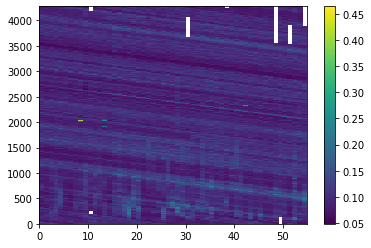

In [37]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

import matplotlib.ticker as ticker


b=s4_1min

piv = pd.pivot_table(b, index='Tiempo', columns='Day', values='S4')
print(piv)
xi = np.linspace(b.Day.min(), b.Day.max(), 600)
yi = np.linspace(b.Tiempo.min(), b.Tiempo.max(), 600)
print(b.Tiempo.max())

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.

levels = MaxNLocator(nbins=15).tick_values(df.S4.min(), df.S4.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


fig, ax = plt.subplots()  

#ax.contour(piv,  levels=levels,cmap=cmap) ## ORIGINAL
gra=ax.pcolormesh(piv)
fig.colorbar(gra)



#my_xtick_labels = np.arange(0,48)
#ax.set_yticklabels( my_xtick_labels )



#https://stackoverflow.com/questions/43525546/plotting-pcolormesh-from-filtered-pandas-dataframe-for-defined-x-y-ranges-even

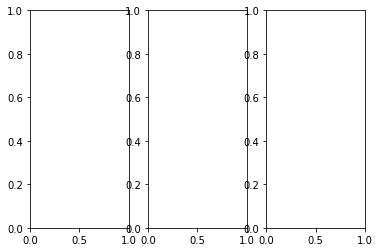

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

a=s4_clean
a['day'] = a.index.to_julian_date()
a['minute'] = a.index.minute
#print(df.pivot(index='X', columns='Y', values='Z'))

data = np.random.rand(5,5) * 20


# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, axes = plt.subplots(nrows=1, ncols=3)
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=3)
ax.set_xticks(np.arange(-1, 10, 1));
ax.set_yticks(np.arange(-1,10, 1));

plt.show()

401 401
[[ 0.18037951  0.19733048  0.21459411 ...  0.49857513  0.47038408
   0.44192559]
 [ 0.18578228  0.20270124  0.21993009 ...  0.4900618   0.46164825
   0.43297564]
 [ 0.19118426  0.20807066  0.22526419 ...  0.48205905  0.45344802
   0.42458669]
 ...
 [-0.22536417 -0.22451567 -0.22158639 ...  0.43931198  0.41438653
   0.39023198]
 [-0.22893885 -0.22786455 -0.2247023  ...  0.44279591  0.41865718
   0.39532695]
 [-0.23247283 -0.23117085 -0.22777383 ...  0.44690761  0.42357046
   0.40107702]]


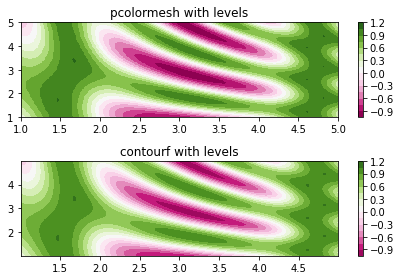

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

# make these smaller to increase the resolution
dx, dy = 0.01, 0.01

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]



print(len(x),len(y))
z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)
print(z)




# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

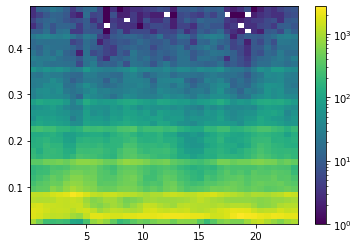

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

s4_2=s4[s4['S4']>0.2]
s4_2=s4[s4['S4']<0.5]
a = s4_2['Tiempo'].apply(lambda x: x/3600+18 if x <= 6 else x/3600)
y,x=s4_2['S4'],s4_2.Tiempo/3600-6

fig, ax = plt.subplots()
h = ax.hist2d(a, y, bins=40, norm=LogNorm())
fig.colorbar(h[3], ax=ax)

(array([[1.317e+03, 5.891e+03, 4.494e+03, 2.067e+03, 1.045e+03, 6.540e+02,
         5.890e+02, 6.030e+02, 2.670e+02, 4.640e+02, 3.900e+02, 3.510e+02,
         2.180e+02, 1.690e+02, 1.260e+02, 1.130e+02, 4.000e+01, 8.200e+01,
         8.900e+01, 7.800e+01, 4.900e+01, 3.600e+01, 2.700e+01, 1.700e+01,
         1.000e+01],
        [4.340e+02, 4.817e+03, 4.241e+03, 2.135e+03, 1.279e+03, 9.310e+02,
         7.590e+02, 6.920e+02, 2.870e+02, 5.750e+02, 4.060e+02, 3.300e+02,
         2.550e+02, 2.000e+02, 1.630e+02, 1.370e+02, 5.600e+01, 8.900e+01,
         7.900e+01, 7.100e+01, 5.900e+01, 6.200e+01, 4.300e+01, 3.800e+01,
         3.100e+01],
        [3.640e+02, 4.265e+03, 4.185e+03, 2.693e+03, 1.633e+03, 1.162e+03,
         8.930e+02, 6.680e+02, 3.060e+02, 5.220e+02, 4.050e+02, 3.040e+02,
         2.450e+02, 1.990e+02, 1.650e+02, 1.480e+02, 7.000e+01, 9.000e+01,
         6.800e+01, 7.700e+01, 5.500e+01, 4.800e+01, 3.500e+01, 3.300e+01,
         2.400e+01],
        [3.110e+02, 4.070e+03, 4.357e

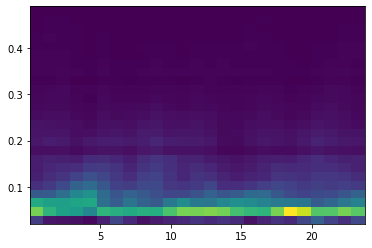

In [ ]:
plt.hist2d(a,y,bins=25)

In [ ]:
plt.hist2d(s4.index.minute.values,s4.S4.values,bins=40)

AttributeError: ignored

In [ ]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt


heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

ValueError: ignored

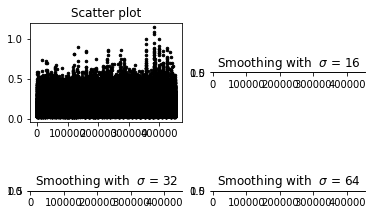

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2)

# Generate some test data
x = s4.index.values #np.random.randn(1000)
y = s4['S4'].values #np.random.randn(1000)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()